# NLP_Lyrics_Clustering

Purpose of this project is to cluseter songs by some variables and try to come up with somekind of a relationship between them. There are 3 parts

### Parts : 
1. **Info** : Display info about data
2. **Feature Extraction** : by using NLTK and tfidf method, we will create vectors to feed to the clustering algorihm
3. **Clustering** : By using k-means, we will try to cluster data

## Info
All credit should go to [Carrie](https://www.kaggle.com/carrie1/drug-of-choice-by-genre-using-song-lyrics) for this section. Thanks alot.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data_set/lyrics.csv")
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [3]:
df = df.replace({'\n' : ' '}, regex = True)
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [4]:
#count the words in each song
df['word_count'] = df['lyrics'].str.split().str.len()
df.head()

,index,song,year,artist,genre,lyrics,word_count
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433.0
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258.0
2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170.0
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522.0
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312.0


In [5]:
#check the word counts by genre
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14387.0,186.086397,82.999049,1.0,128.0,171.0,231.0,1366.0
Electronic,7966.0,193.376475,138.816594,1.0,100.0,170.0,260.0,1920.0
Folk,2243.0,181.037004,120.616688,1.0,111.0,168.0,238.0,2393.0
Hip-Hop,24850.0,489.962052,238.627250,1.0,340.0,485.0,629.0,8195.0
Indie,3149.0,196.854239,108.375014,1.0,126.0,183.0,248.0,1262.0
Jazz,7971.0,172.088320,97.442162,1.0,108.0,152.0,215.0,1040.0
Metal,23759.0,169.068774,112.809568,1.0,100.0,152.0,217.0,2423.0
Not Available,23941.0,210.260683,134.223988,1.0,126.0,189.0,269.0,2570.0
Other,5189.0,224.009828,139.413564,1.0,127.0,193.0,285.0,1569.0


In [6]:
#let's see what the songs with 1 word look like
df1 = df.loc[df['word_count'] == 1]
df1.head()

,index,song,year,artist,genre,lyrics,word_count
420,420,dying-sun,2011,demonaz,Metal,[Instrumental],1.0
1410,1410,curtain-call,2011,brandi-carlile,Country,INSTRUMENTAL,1.0
1710,1710,mary-mheaigi-s-frank-mors-the-trip-to-lerwick,2007,andy-m-stewart,Folk,Instrumental,1.0
1733,1733,treorachadh,2007,andy-m-stewart,Folk,Instrumental,1.0
1841,1841,providence,2007,dreadful-shadows,Rock,[Instrumental],1.0


In [7]:
#elimintate the 1-word songs and review the data again
df = df[df['word_count'] > 2]
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14323.0,186.913426,82.254845,3.0,129.00,171.0,231.00,1366.0
Electronic,7614.0,202.269372,135.539950,3.0,110.00,177.0,264.00,1920.0
Folk,2108.0,192.566888,115.198695,4.0,121.00,175.0,244.00,2393.0
Hip-Hop,24759.0,491.758956,237.214036,3.0,341.50,486.0,629.50,8195.0
Indie,3104.0,199.693621,106.541654,3.0,128.00,184.0,249.00,1262.0
Jazz,7824.0,175.302531,95.462660,3.0,110.00,153.0,216.00,1040.0
Metal,22922.0,175.202644,110.102951,3.0,105.00,155.0,221.00,2423.0
Not Available,23296.0,216.053614,131.412548,3.0,132.00,192.0,273.00,2570.0
Other,5183.0,224.267992,139.287456,3.0,128.00,193.0,286.00,1569.0


In [8]:
#There are still some outliers on the low end. Reviewing songs with less than 100 words.
df100 = df.loc[df['word_count'] <= 100]
df100.head()

,index,song,year,artist,genre,lyrics,word_count
43,43,diamonds,2007,beyonce-knowles,Pop,"Square-cut or pear shaped, These rocks don't l...",28.0
78,78,god-made-you-beautiful,2013,beyonce-knowles,Pop,When you were born The angels sighed in deligh...,85.0
83,83,i-m-glad-there-s-you,2010,beyonce-knowles,Pop,In this world Of ordinary people Exraordinary ...,92.0
85,85,freakdum-dresses,2010,beyonce-knowles,Pop,it's about getting our freakdum drsses on,7.0
89,89,helo,2012,beyonce-knowles,Pop,baby you know i love you baby you know i need ...,35.0


In [9]:
#let's check on the high end
df1000 = df.loc[df['word_count'] >= 1000]
df1000.head()

,index,song,year,artist,genre,lyrics,word_count
95,95,get-me-bodied,2006,beyonce-knowles,Pop,"Nine, four, eight, one B day Mission one: I'm-...",1122.0
113,113,get-me-bodied-extended-remix-bonus-track,2006,beyonce-knowles,Pop,"Nine, four, eight, one B'day Mission one, Ima ...",1014.0
1590,1590,tour-hip-hop-version,2006,capleton,Electronic,Yeah I say straighten yuh crooked ways Blessed...,1034.0
2339,2339,burnt,2007,del-the-funky-homosapien,Hip-Hop,"DEL: Mista, twista, get ya every single time w...",1068.0
7464,7464,stan,2006,dido,Pop,My tea's gone cold I'm wondering why I Got out...,1238.0


In [10]:
#let's get rid of the outliers on the low and high end using somewhat randomly selected points
del df1, df100, df1000 
df_clean = df[df['word_count'] >= 100]
df_clean = df[df['word_count'] <= 1000]
df_clean['word_count'].groupby(df_clean['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14322.0,186.831099,81.665463,3.0,129.0,171.0,231.0,895.0
Electronic,7610.0,201.665834,132.743690,3.0,110.0,177.0,264.0,990.0
Folk,2106.0,191.008547,102.103598,4.0,121.0,175.0,244.0,998.0
Hip-Hop,24313.0,478.554683,207.779801,3.0,339.0,481.0,619.0,1000.0
Indie,3101.0,198.804257,102.633118,3.0,128.0,184.0,249.0,952.0
Jazz,7823.0,175.191998,94.966745,3.0,110.0,153.0,216.0,935.0
Metal,22909.0,174.540966,105.849485,3.0,105.0,155.0,220.0,999.0
Not Available,23272.0,214.986851,126.604084,3.0,132.0,192.0,272.0,994.0
Other,5180.0,223.578185,136.316986,3.0,128.0,193.0,285.0,986.0


In [11]:
# lets get rid of "not available" and "other"
df_clean = df_clean[df_clean["genre"] != "Not Available"]
df_clean = df_clean[df_clean["genre"] != "Other"]
df_clean['word_count'].groupby(df_clean['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14322.0,186.831099,81.665463,3.0,129.0,171.0,231.0,895.0
Electronic,7610.0,201.665834,132.743690,3.0,110.0,177.0,264.0,990.0
Folk,2106.0,191.008547,102.103598,4.0,121.0,175.0,244.0,998.0
Hip-Hop,24313.0,478.554683,207.779801,3.0,339.0,481.0,619.0,1000.0
Indie,3101.0,198.804257,102.633118,3.0,128.0,184.0,249.0,952.0
Jazz,7823.0,175.191998,94.966745,3.0,110.0,153.0,216.0,935.0
Metal,22909.0,174.540966,105.849485,3.0,105.0,155.0,220.0,999.0
Pop,40227.0,246.409849,125.517232,3.0,158.0,225.0,311.0,1000.0
R&B,3388.0,224.998524,116.450457,5.0,142.0,204.0,281.0,892.0


In [12]:
# save df_clean
import os.path
if not os.path.exists("./data_frame/") :
    os.makedirs("./data_frame/")

df_clean.to_csv("./data_frame/df_clean.csv",sep=";",index=False)

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233457 entries, 0 to 362236
Data columns (total 7 columns):
index         233457 non-null int64
song          233456 non-null object
year          233457 non-null int64
artist        233457 non-null object
genre         233457 non-null object
lyrics        233457 non-null object
word_count    233457 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 24.2+ MB


In [14]:
genre = df_clean.groupby(['genre'],as_index=False).count()
genre2 = genre[['genre','song']]
genre2

,genre,song
0,Country,14322
1,Electronic,7610
2,Folk,2106
3,Hip-Hop,24313
4,Indie,3101
5,Jazz,7822
6,Metal,22909
7,Pop,40227
8,R&B,3388
9,Rock,107658


## Feature extraction

I this step, we will try to turn lyrics into vectors so we can feed them to a learning algorithm.

### Steps:
1. Delete stopwords
2. Tokenize
3. Stem
4. Calculate tfidf

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

df_clean.head()


,index,song,year,artist,genre,lyrics,word_count
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433.0
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258.0
2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170.0
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522.0
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312.0


### Tokenize and delete stop words

In [16]:
# Tokenize
df_clean["lyrics"] = [ word_tokenize(lyric) for lyric in df_clean["lyrics"] ]
df_clean["word_count"] = [ len(lyric) for lyric in df_clean["lyrics"] ]
df_clean.head()

,index,song,year,artist,genre,lyrics,word_count
0,0,ego-remix,2009,beyonce-knowles,Pop,"[Oh, baby, ,, how, you, doing, ?, You, know, I...",512
1,1,then-tell-me,2009,beyonce-knowles,Pop,"[playin, ', everything, so, easy, ,, it, 's, l...",306
2,2,honesty,2009,beyonce-knowles,Pop,"[If, you, search, For, tenderness, It, is, n't...",184
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"[Oh, oh, oh, I, ,, oh, oh, oh, I, [, Verse, 1,...",600
4,4,black-culture,2009,beyonce-knowles,Pop,"[Party, the, people, ,, the, people, the, part...",394


In [17]:
def remove_stop_words(text,stopwords):
    cleaned_text = []
    for word in text:
        if word not in stopwords:
            cleaned_text.append(word)
    return cleaned_text

In [18]:
# Delete stop words
stopWords = set(stopwords.words('english'))

df_clean["lyrics"] = [ remove_stop_words(text,stopWords) for text in df_clean["lyrics"]]
df_clean["word_count"] = [ len(lyric) for lyric in df_clean["lyrics"] ]
df_clean.head()

del stopWords

In [19]:
# Stem
def stem(wordsFiltered, st = PorterStemmer()):

    stemed = []
    for i in range(len(wordsFiltered)):
        stemed.append(st.stem(wordsFiltered[i]))

    return stemed

In [20]:
df_clean["lyrics"] = [ stem(text,st = PorterStemmer()) for text in df_clean["lyrics"]]
df_clean["lyrics"][:5]

0    [Oh, babi, ,, ?, you, know, I, 'm, gon, na, cu...
1    [playin, ', everyth, easi, ,, 's, like, seem, ...
2    [If, search, for, tender, It, n't, hard, find,...
3    [Oh, oh, oh, I, ,, oh, oh, oh, I, [, vers, 1, ...
4    [parti, peopl, ,, peopl, parti, 's, pop, sit, ...
Name: lyrics, dtype: object

In [21]:
# tokenizing and stemming takes too much time!!! 
df_clean.to_csv("./data_frame/df_clean_stemmed.csv",sep=";",index=False)

## tfidf

>In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. [wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

### Term frequency
>In the case of the term frequency tf(t,d), the simplest choice is to use the raw count of a term in a document, i.e. the number of times that term t occurs in document d. If we denote the raw count by ft,d, then the simplest tf scheme is tf(t,d) = ft,d.

### Inverse document frequency
>The inverse document frequency is a measure of how much information the word provides, that is, whether the term is common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word, obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient.


In [22]:
# Term frequency : count / number of words in bow
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    # print(wordDict)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bowCount)
    return tfDict

In [23]:
# Inverse document frequency : 
# log( total_number_of_documents_in_the_corpus / total_count_of_word )
def computeIDF(docList):
    import math
    N = len(docList)
    #divide N by denominator above, take the log of that
    for word, val in docList.items():
        docList[word]= math.log(N / float(val)) 

    return docList

In [24]:
# Term frequency–Inverse document frequency : tf * idf
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [25]:
# create a feature dict
def create_feature_dict(df):
    feature_dict = {}
    count_words = 0
    for lyrics in df["lyrics"]:
        for word in lyrics:
            if word not in feature_dict.keys():
                feature_dict[word] = 1
            else:
                feature_dict[word] += 1
            count_words += 1

    return feature_dict

In [26]:
feature_dict = create_feature_dict(df_clean)

len(feature_dict)
# THIS IS RIDICULOUS

405954

In [27]:
# thresholding
# we need to invent a way to decrease feature_length

def thresholding(feature_dict, threshold = .3):
    # to do this first we need to calulate how sum of all feature values
    value_sum = sum(feature_dict.values())
    # then we calculate mean
    mean = value_sum / len(feature_dict)

    # set threshold value / original tests made with .3
    threshold = 1

    # lets pop values that are smaller than mean
    feature_dict_cleaned = dict(feature_dict)

    for key in list(feature_dict_cleaned.keys()):
        if feature_dict_cleaned[key] < mean * threshold:
            del feature_dict_cleaned[key]


    return feature_dict_cleaned

In [28]:
# calculates tfidf for all examples, creates X and Y to feed to any learning algortihm
def create_vector(data, feature_vector, class_list):

    def find_cls_index(y):
        for i,c in enumerate(class_list):
            if c == y:
                return i
        print("ERROR. This class does not exist in the list!")
        quit()


    vectors = []
    classes = []
    for text,c in data:
        if(len(text) == 0):
            raise AttributeError("text is empty")

        # create y

        c = find_cls_index(c)
        classes.append(c)

        # create vectors to feed tfidf
        vector = dict.fromkeys(feature_vector,0)
        for w in text:
            if w in feature_vector:
                vector[w] += 1
        vectors.append(vector)



    tfidfs = []

    # calculate tfidfs 
    idfs = computeIDF(feature_vector)

    for i in range(0,len(data)):
        tf = computeTF(vectors[i],data[i][0])
        tfidf = computeTFIDF(tf,idfs)
        tfidfs.append(np.array(list(tfidf.values())))

    # X and Y // numpy arrays
    return np.array(tfidfs), np.array(classes)


# Clustering

We used k-means to cluster given data.
There are few steps before running clustering

### Steps :
1. Create data (lyrics, class)
2. Create vector (by using create_vector function)
3. Run clustering algorithm (k-means)

In [29]:
# We will start with createing a class_list
# For this run we chose genres
class_list = []

for g in genre2["genre"]:
    class_list.append(g)
    
class_list

['Country',
 'Electronic',
 'Folk',
 'Hip-Hop',
 'Indie',
 'Jazz',
 'Metal',
 'Pop',
 'R&B',
 'Rock']

In [30]:
# lets make some cleaning before start
del genre, genre2, df

### Preparing data

Size of the feature vector is ridiculous if it is prepared for the entire data set. We may create a smaller, simpler sub set to use in clustering

#### Options we can do to small the size :
1. Creating feature dictionary for a smaller data set
2. Thresholding


For this example we create a sub set with year 2009's songs.


In [31]:
df_clean = df_clean[df_clean["year"] == 2009]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8736 entries, 0 to 361981
Data columns (total 7 columns):
index         8736 non-null int64
song          8735 non-null object
year          8736 non-null int64
artist        8736 non-null object
genre         8736 non-null object
lyrics        8736 non-null object
word_count    8736 non-null int64
dtypes: int64(3), object(4)
memory usage: 546.0+ KB


In [32]:
df_clean['word_count'].groupby(df_clean['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,327.0,147.596330,51.358559,8.0,109.00,145.0,186.00,321.0
Electronic,283.0,173.095406,108.057222,9.0,97.00,154.0,218.00,685.0
Folk,72.0,159.291667,77.882981,17.0,99.00,160.0,191.50,403.0
Hip-Hop,1261.0,368.217288,169.353023,7.0,250.00,358.0,484.00,1021.0
Indie,131.0,148.832061,76.551657,13.0,95.00,145.0,191.00,461.0
Jazz,338.0,160.899408,79.103369,10.0,101.25,152.5,204.75,461.0
Metal,489.0,151.071575,82.856538,15.0,101.00,140.0,182.00,760.0
Pop,2046.0,205.126100,106.014123,3.0,131.00,189.5,259.75,842.0
R&B,69.0,210.420290,111.763854,67.0,129.00,172.0,261.00,636.0


In [33]:
# Total count
len(df_clean)

8736

In [34]:
feature_dict = create_feature_dict(df_clean)
# feature_dict

In [35]:
# feature length
len(feature_dict)

45734

In [36]:
# after threshold
feature_dict_clean = thresholding(feature_dict)
len(feature_dict_clean)

2969

We may try to create a small sample for testing.

We will try to cluster <b>Jazz</b> and <b>Metal</b> songs that are published in <b>2009</b>.

In [39]:
# combine 2 data frames with genres Metal and Jazz
data = df_clean[df_clean["genre"] == "Jazz"][:300]
data = data.append(df_clean[df_clean["genre"] == "Metal"][:300])
# data

In [41]:
len(data)

600

In [42]:
feature_dict = create_feature_dict(data)
# feature_dict

In [43]:
# lenght of feature dictionary before thresholdin
len(feature_dict)

10296

In [44]:
# after threshold
feature_dict_clean = thresholding(feature_dict)
# feature_dict_clean

In [45]:
# lenght of feature dictionary after thresholdin
len(feature_dict_clean)

1367

In [46]:
# lets create class_list in this case it consist of Metal and Jazz
class_list = list(data.genre.unique())

class_list

['Jazz', 'Metal']

In [47]:
data = data[["lyrics","genre"]]
d = data.values.tolist()
# d

In [48]:
# create vectors and corresponding classes
X,Y = create_vector(d,feature_dict_clean,class_list)


In [49]:
# lets see what an element in Y and X seems like
print(Y[0])
print()
for x in X[0]:
    print(x,end='  ')

0

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.019122646186  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0203569173776  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0120256301883  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0407138347553  0.0  0.0  0.0  0.0  0.0  0.0175759683771  0.0  0.0  0.0  0.0239049630426  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0158263855791  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0183532868116  0.054585862572  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [50]:
# Finally clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1, init = "random", max_iter = 100000).fit(X)
labels = kmeans.labels_

labels[:5]

array([0, 1, 0, 0, 1], dtype=int32)

In [51]:

cluster1 = []
cluster2 = []

for i in range(len(Y)):
    if labels[i] == 1:
        cluster1.append(Y[i])
    else:
        cluster2.append(Y[i])


In [52]:
print("----cluster1----")
print("zeros : ",cluster1.count(0))
print("ones  : ",cluster1.count(1))
print("----cluster2----")
print("zeros : ",cluster2.count(0))
print("ones  : ",cluster2.count(1))


----cluster1----
zeros :  83
ones  :  79
----cluster2----
zeros :  217
ones  :  221


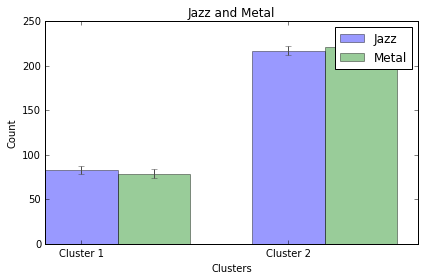

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


n_groups = 2

means_men = (cluster1.count(0), cluster2.count(0))

means_women = (cluster1.count(1),cluster2.count(1) )

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=5, error_kw=error_config,
                label='Jazz')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='g',
                yerr=5, error_kw=error_config,
                label='Metal')

ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_title('Jazz and Metal')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Cluster 1', 'Cluster 2'))
ax.legend()

fig.tight_layout()
plt.show()

This result is not very satisfying. This document might be improved and test might be made with different parameters.